# Escalado

Es escalado es una técnica  utilizada para transformar los valores de los diferentes atributos de un dataset para que todos se encuentren dentro del <b>mismo rango</b>.
Al trabajar con un dataset debido a la naturaleza variada de los distintos atributos en comun encontrar que los rangos numéricos son muy diferentes entre si. Por ejemplo, en un dataset que lista precios de propiedades y sus características el precio tendrá un rango mucho mayor que la cantidad de habitaciones o los años de la propiedad.

Ciertos modelos de Machine Learning que utilizan como entrenamiento valores numéricos pueden determinar aquellos atributos con rango mayor como más relevantes que los otros en sus resultados. Para evitar esto antes de alimentar a un modelo con estos datos las columnas deben ser <b>escaladas</b> para que todas tengan el mismo rango y sean tratadas con la misma importancia. 

Al hacerlo también es importante asegurarse que la <b>relacion de los valores</b> con las del resto del mismo atributo se mantengan y no que no se modifique el <b>significado de los datos</b>.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer csv
df = pd.read_csv('../data/climate_daily.csv')

df

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-111.32,49.05,ADEN,3040049,2000-01-01,2000,1,1,NaN,-1.5,...,2.0,E,2.0,E,NaN,NaN,NaN,NaN,NaN,NaN
1,-111.32,49.05,ADEN,3040049,2000-01-02,2000,1,2,NaN,-15.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-111.32,49.05,ADEN,3040049,2000-01-03,2000,1,3,NaN,-8.5,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-111.32,49.05,ADEN,3040049,2000-01-04,2000,1,4,NaN,6.0,...,1.5,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-111.32,49.05,ADEN,3040049,2000-01-05,2000,1,5,NaN,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,-111.32,49.05,ADEN,3040049,2000-08-27,2000,8,27,NaN,22.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
240,-111.32,49.05,ADEN,3040049,2000-08-28,2000,8,28,NaN,22.5,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
241,-111.32,49.05,ADEN,3040049,2000-08-29,2000,8,29,NaN,24.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
242,-111.32,49.05,ADEN,3040049,2000-08-30,2000,8,30,NaN,13.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Seleccionar columnas
columns_names = ['Max Temp (°C)', 'Min Temp (°C)','Total Snow (cm)','Heat Deg Days (°C)']
# Crear copia con las columnas seleccionadas
df_cols = df[columns_names].copy(deep = True)
# Crear lista con colores
color = []
for i in range(len(df_cols.melt())):
    if df_cols.melt()["variable"][i] == 'Max Temp (°C)':
        x_color = "blue"
    if df_cols.melt()["variable"][i] == 'Min Temp (°C)':
        x_color = "orange"
    if df_cols.melt()["variable"][i] == 'Total Snow (cm)':
        x_color = "yellow"
    if df_cols.melt()["variable"][i] == 'Heat Deg Days (°C)':
        x_color = "red"
    color.append(x_color)

<AxesSubplot:xlabel='variable', ylabel='value'>

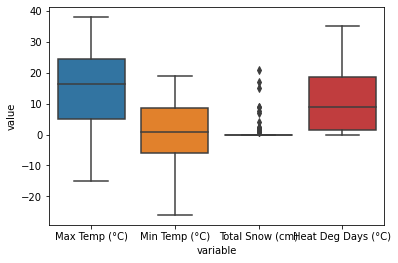

In [3]:
sns.boxplot(x='variable',y='value',data = df_cols.melt())

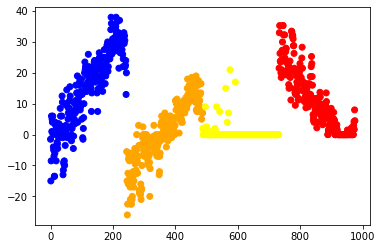

In [4]:
plt.scatter(df_cols.melt().index,df_cols.melt()["value"], c=color)
plt.show()

## Escalador máximo-mínimo

- Sencillo
- Convierte los valores dentro de un rango de 0 a 1

<code>x(escalado)=[x–x(min)]/[x(max)–x(min)]</code>

<AxesSubplot:xlabel='variable', ylabel='value'>

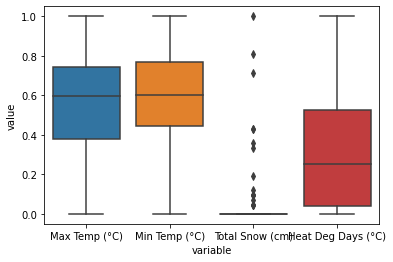

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Crear modelo
scaler_minmax = MinMaxScaler()
# Ajustar el modelo sobre las columnas
df_cols_maxmin = pd.DataFrame(scaler_minmax.fit_transform(df_cols), columns = df_cols.columns)
sns.boxplot(x='variable',y='value',data = df_cols_maxmin.melt())

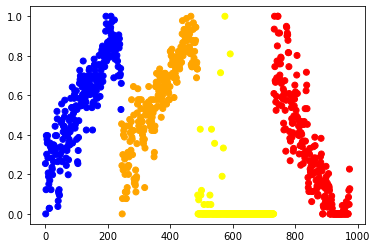

In [6]:
plt.scatter(df_cols_maxmin.melt().index,df_cols_maxmin.melt()["value"], c=color)
plt.show()

## Escalador estandar

- Escala los valores para que la media esté cerca de  0 y la desviación estandar cerca de 1
- Asume que los datos tienen una distribución normal

<code>x(escalado)=x−media/desviaciónEstandar</code>

<AxesSubplot:xlabel='variable', ylabel='value'>

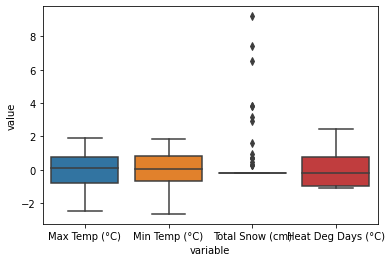

In [7]:
from sklearn.preprocessing import StandardScaler
# Crear modelo
scaler_standard = StandardScaler()
# Ajustar el modelo sobre las columnas
df_cols_standard = pd.DataFrame(scaler_standard.fit_transform(df_cols), columns = df_cols.columns)
sns.boxplot(x='variable',y='value',data = df_cols_standard.melt())

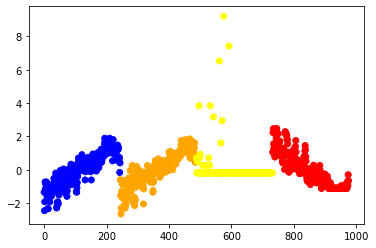

In [8]:
plt.scatter(df_cols_standard.melt().index,df_cols_standard.melt()["value"], c=color)
plt.show()

## Escalador de máximo absoluto

- Se utiliza cuando hay valores positivos y negativos en los atributos 
- Divide cada valor por el máximo absoluto para su atributo correspondiente
- Los valores tienen un ranto de -1 a 1

<AxesSubplot:xlabel='variable', ylabel='value'>

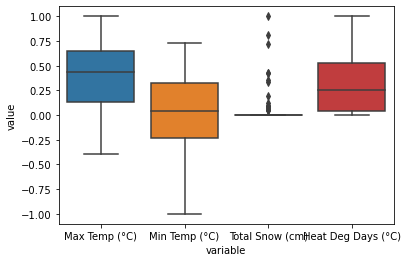

In [9]:
from sklearn.preprocessing import MaxAbsScaler
# Crear modelo
scaler_maxabs = MaxAbsScaler()
# Ajustar el modelo sobre las columnas
df_cols_maxabs = pd.DataFrame(scaler_maxabs.fit_transform(df_cols), columns = df_cols.columns)
sns.boxplot(x='variable',y='value',data = df_cols_maxabs.melt())

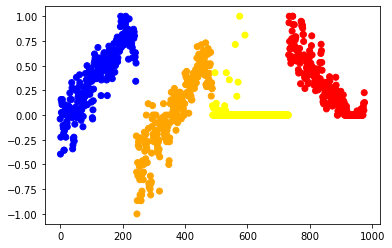

In [10]:
plt.scatter(df_cols_maxabs.melt().index,df_cols_maxabs.melt()["value"], c=color)
plt.show()

## Escalador robusto

- Utiliza rangos intercuartiles
- No es sensible a valores atípicos

<code>x(escalado)=(x−Q1)/(Q3−Q1)</code>

<AxesSubplot:xlabel='variable', ylabel='value'>

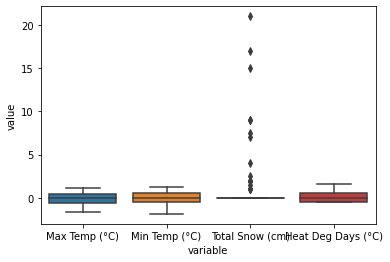

In [11]:
from sklearn.preprocessing import RobustScaler
# Crear modelo
scaler_robust = RobustScaler()
# Ajustar el modelo sobre las columnas
df_cols_robust = pd.DataFrame(scaler_robust.fit_transform(df_cols), columns = df_cols.columns)
sns.boxplot(x='variable',y='value',data = df_cols_robust.melt())

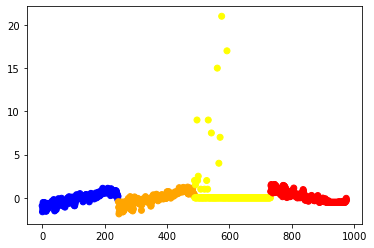

In [12]:
plt.scatter(df_cols_robust.melt().index,df_cols_robust.melt()["value"], c=color)
plt.show()

## Escalador de transformación de cuartil

- Convierte la distribución del atributo en una distribución normal antes de escalar.
- Eficiente para datos atípicos
- Puede afecta la correlación entre atributos que tienen la misma escala
- Obtiene la función de distribución acumulativa de cada atributo, usa dicha función para mapear los valores a una distribucción normal y finlmente escala los valores usando la función de cuantil asociado.
- Los datos tienen un rango de 0 a 1


/home/andy/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


<AxesSubplot:xlabel='variable', ylabel='value'>

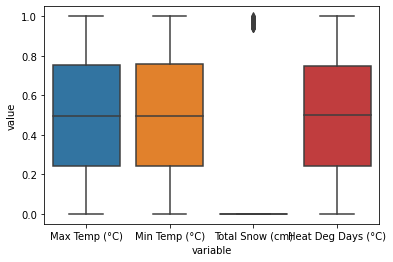

In [13]:
from sklearn.preprocessing import QuantileTransformer
# Crear modelo
scaler_tq = QuantileTransformer()
# Ajustar el modelo sobre las columnas
df_cols_tq = pd.DataFrame(scaler_tq.fit_transform(df_cols), columns = df_cols.columns)
sns.boxplot(x='variable',y='value',data = df_cols_tq.melt())

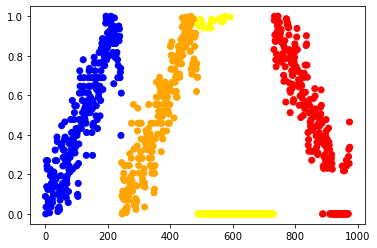

In [14]:
plt.scatter(df_cols_tq.melt().index,df_cols_tq.melt()["value"], c=color)
plt.show()